In [1]:
import pandas as pd

# Reload and inspect the raw dataset
raw_df = pd.read_csv("Waste_collection_and_recycling_England_data_2022_23.csv", low_memory=False)

# Display the first 10 rows to identify where the actual data starts
raw_df.head(10)


,This file contains data (subject to change) for the selected authorities and periods only if returns have been completed.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Authority,Period,QuestionNumber,QuText,CollateText,RowText,ColText,Data,RowOrder,ColOrder,RowIdent,ColIdent,CollateID,columngroup,MaterialGroup
1,Adur District Council,Apr 22 - Jun 22,Q001,Authority Data: Note this data is prefilled.,NaN,Population of Authority,NaN,64626,1,1,587,271,-1,NaN,NaN
2,Adur District Council,Apr 22 - Jun 22,Q001,Authority Data: Note this data is prefilled.,NaN,Area in Hectares,NaN,4293.882,2,1,588,271,-1,NaN,NaN
3,Adur District Council,Apr 22 - Jun 22,Q001,Authority Data: Note this data is prefilled.,NaN,Population Density of Authority,NaN,15.051,3,1,589,271,-1,NaN,NaN
4,Adur District Council,Apr 22 - Jun 22,Q002,Authority Data: Note this data is prefilled.,NaN,Number of Households,NaN,26000,1,1,590,334,-1,NaN,NaN
5,Adur District Council,Apr 22 - Jun 22,Q002,Authority Data: Note this data is prefilled.,NaN,Dwelling Stock,NaN,28710,2,1,591,334,-1,NaN,NaN
6,Adur District Council,Apr 22 - Jun 22,Q002,Authority Data: Note this data is prefilled.,NaN,Index of Deprivation,NaN,17.594,3,1,592,334,-1,NaN,NaN
7,Adur District Council,Apr 22 - Jun 22,Q002,Authority Data: Note this data is prefilled.,NaN,BMW % Conversion factor,NaN,68,4,1,706,334,-1,NaN,NaN
8,Adur District Council,Apr 22 - Jun 22,Q002,Authority Data: Note this data is prefilled.,NaN,MBT Reduction Factor (Apr 2009 on),NaN,1,5,1,2279,334,-1,NaN,NaN
9,Adur District Council,Apr 22 - Jun 22,Q010,Tonnes of material collected through kerbside ...,NaN,Green garden waste only,Tonnage collected for recycling,791.94,1,1,1445,21,-1,NaN,Organic


In [2]:
# Set new header from the first row and drop the first row
df = raw_df.copy()
df.columns = df.iloc[0]
df = df[1:]

# Rename columns for clarity
df = df.rename(columns={
    df.columns[0]: "Authority",
    df.columns[1]: "Period",
    df.columns[2]: "QuestionNumber",
    df.columns[3]: "QuText",
    df.columns[4]: "CollateText",
    df.columns[5]: "RowText",
    df.columns[6]: "ColText",
    df.columns[7]: "Data",
    df.columns[8]: "RowOrder",
    df.columns[9]: "ColOrder",
    df.columns[10]: "RowIdent",
    df.columns[11]: "ColIdent",
    df.columns[12]: "CollateID",
    df.columns[13]: "ColumnGroup",
    df.columns[14]: "MaterialGroup"
})

# Convert 'Data' column to numeric (errors='coerce' turns invalid values to NaN)
df["Data"] = pd.to_numeric(df["Data"], errors='coerce')

# Drop rows with missing authority or period
df_cleaned = df.dropna(subset=["Authority", "Period"])

# Show cleaned structure
df_cleaned.shape, df_cleaned.columns.tolist(), df_cleaned.head(3)


((99110, 15),
 ['Authority',
  'Period',
  'QuestionNumber',
  'QuText',
  'CollateText',
  'RowText',
  'ColText',
  'Data',
  'RowOrder',
  'ColOrder',
  'RowIdent',
  'ColIdent',
  'CollateID',
  'ColumnGroup',
  'MaterialGroup'],
 0              Authority           Period QuestionNumber  \
 1  Adur District Council  Apr 22 - Jun 22           Q001   
 2  Adur District Council  Apr 22 - Jun 22           Q001   
 3  Adur District Council  Apr 22 - Jun 22           Q001   
 
 0                                         QuText CollateText  \
 1  Authority Data:  Note this data is prefilled.         NaN   
 2  Authority Data:  Note this data is prefilled.         NaN   
 3  Authority Data:  Note this data is prefilled.         NaN   
 
 0                          RowText ColText       Data RowOrder ColOrder  \
 1          Population of Authority     NaN  64626.000        1        1   
 2                 Area in Hectares     NaN   4293.882        2        1   
 3  Population Density of Auth

In [4]:
# Pivot the data: One row per Authority + Period, columns from RowText
pivot_df = df_cleaned.pivot_table(
    index=["Authority", "Period"],
    columns="RowText",
    values="Data",
    aggfunc="first"
).reset_index()

# Show the resulting shape and a few sample rows
pivot_df.shape, pivot_df.columns[:10].tolist()


((1332, 118),
 ['Authority',
  'Period',
  'Aerosols',
  'Aluminium cans',
  'Aluminium foil',
  'Area in Hectares',
  'Asbestos Waste separately collected',
  'Automotive batteries',
  'BMW % Conversion factor',
  'Beach cleansing'])

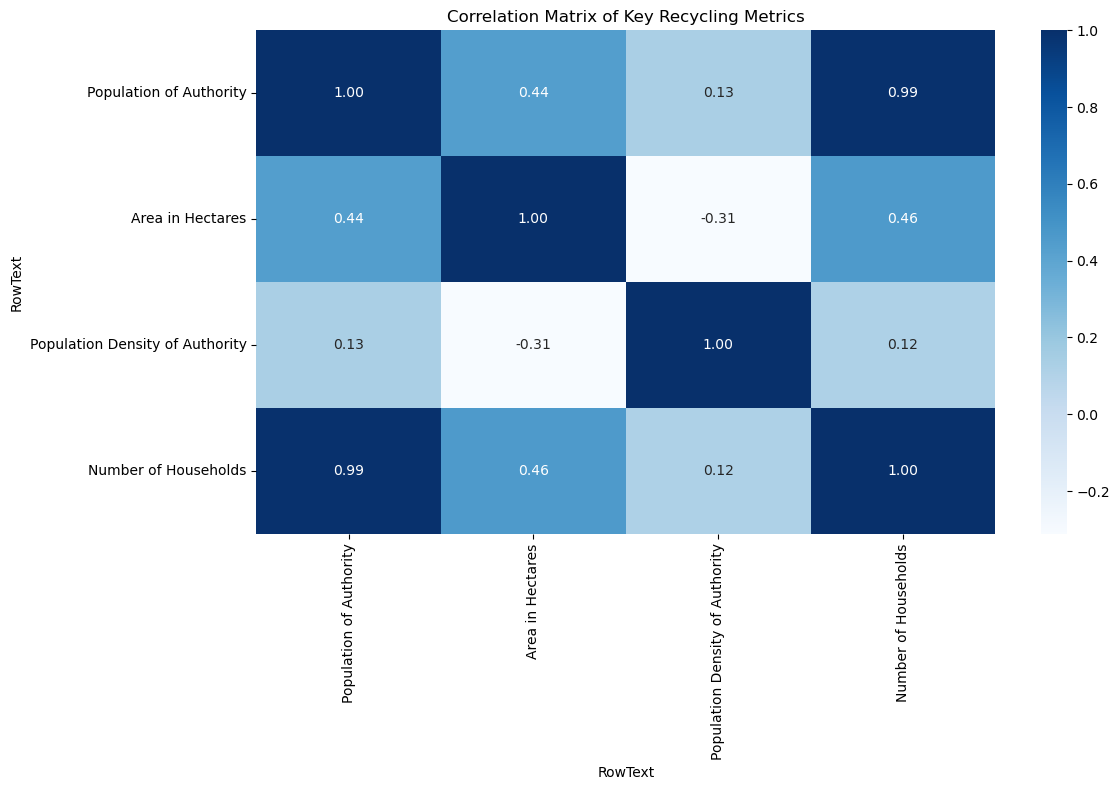

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select some key columns for EDA
eda_columns = [
    "Population of Authority",
    "Area in Hectares",
    "Population Density of Authority",
    "Number of Households",
    "Green garden waste only  Tonnage collected for recycling",
    "Food waste only  Tonnage collected for recycling",
    "Plastic bottles only  Tonnage collected for recycling",
    "Glass  Tonnage collected for recycling",
    "Overall recycling rate (Household waste)"
]

# Filter the dataset to include only those columns that exist
available_eda_columns = [col for col in eda_columns if col in pivot_df.columns]
eda_df = pivot_df[available_eda_columns].dropna()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = eda_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix of Key Recycling Metrics")
plt.tight_layout()
plt.show()


In [7]:
# Prepare a clean dataset with only the selected metrics
metrics_df = pivot_df[[
    "Authority",
    "Period",
    "Population of Authority",
    "Area in Hectares",
    "Population Density of Authority",
    "Number of Households"
]].dropna()

metrics_df.head()

RowText,Authority,Period,Population of Authority,Area in Hectares,Population Density of Authority,Number of Households
0,Adur District Council,Apr 22 - Jun 22,64626.0,4293.882,15.051,26000.0
1,Adur District Council,Jan 23 - Mar 23,64626.0,4293.882,15.051,26000.0
2,Adur District Council,Jul 22 - Sep 22,64626.0,4293.882,15.051,26000.0
3,Adur District Council,Oct 22 - Dec 22,64626.0,4293.882,15.051,26000.0
4,Allerdale Borough Council,Apr 22 - Jun 22,96384.0,129686.527,0.743,41000.0


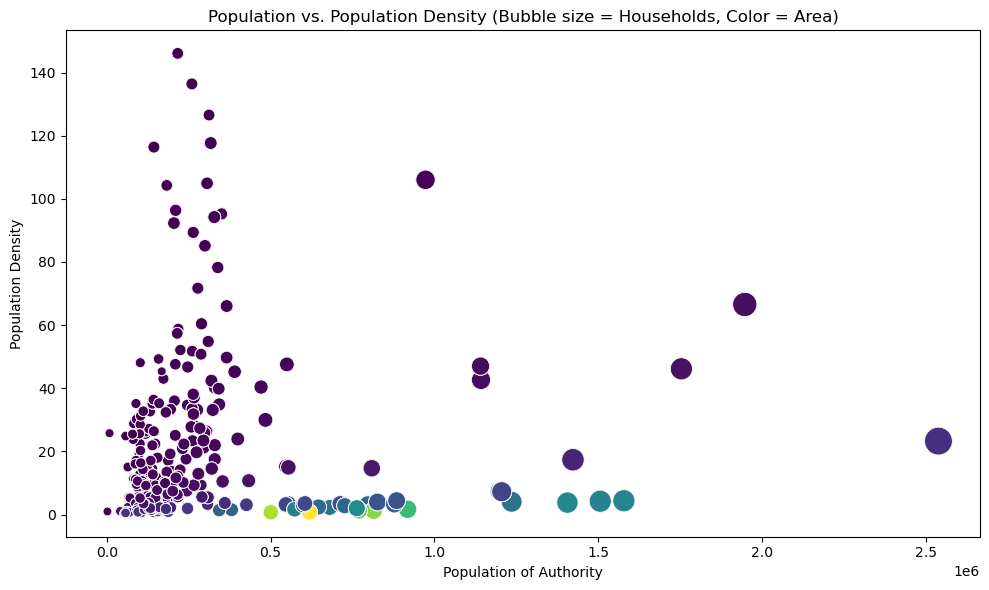

In [8]:
# Scatter plot: Population vs Density, sized by Number of Households
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=metrics_df,
    x="Population of Authority",
    y="Population Density of Authority",
    size="Number of Households",
    hue="Area in Hectares",
    palette="viridis",
    sizes=(40, 400),
    legend=False
)
plt.title("Population vs. Population Density (Bubble size = Households, Color = Area)")
plt.xlabel("Population of Authority")
plt.ylabel("Population Density")
plt.tight_layout()
plt.show()


/tmp/ipykernel_43860/866203371.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=metrics_df, x="Area Type", palette="Set2")


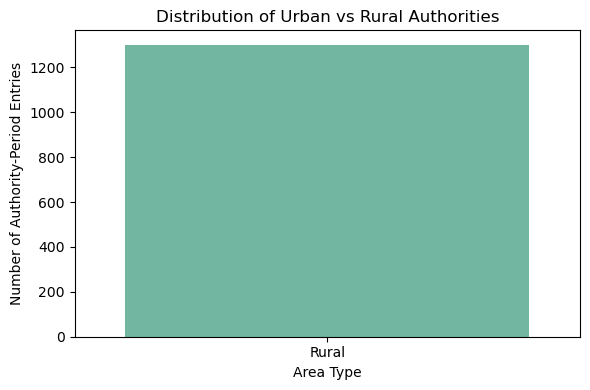

In [10]:
# threshold of 500 people per hectare 
metrics_df["Area Type"] = metrics_df["Population Density of Authority"].apply(
    lambda x: "Urban" if x >= 500 else "Rural"
)

# Count of Urban vs Rural
area_type_counts = metrics_df["Area Type"].value_counts()

# Bar plot
plt.figure(figsize=(6, 4))
sns.countplot(data=metrics_df, x="Area Type", palette="Set2")
plt.title("Distribution of Urban vs Rural Authorities")
plt.ylabel("Number of Authority-Period Entries")
plt.tight_layout()
plt.show()




In [12]:
#  group summary
group_summary = metrics_df.groupby("Area Type")[[
    "Population of Authority",
    "Area in Hectares",
    "Population Density of Authority",
    "Number of Households"
]].mean().round(2)
print(group_summary)

RowText    Population of Authority  Area in Hectares  \
Area Type                                              
Rural                     256704.2          59728.09   

RowText    Population Density of Authority  Number of Households  
Area Type                                                         
Rural                                17.62              95242.22  


/tmp/ipykernel_43860/3241623505.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=metrics_df, x="Area Type", palette="coolwarm")


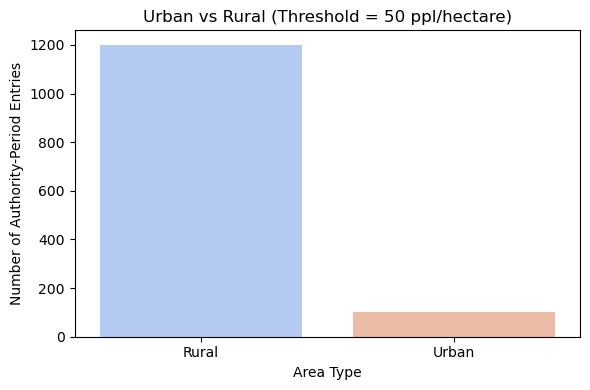

In [14]:
# lower threshold 50 people per hectare
new_threshold = 50
metrics_df["Area Type"] = metrics_df["Population Density of Authority"].apply(
    lambda x: "Urban" if x >= new_threshold else "Rural"
)



# Count of updated Area Types
plt.figure(figsize=(6, 4))
sns.countplot(data=metrics_df, x="Area Type", palette="coolwarm")
plt.title(f"Urban vs Rural (Threshold = {new_threshold} ppl/hectare)")
plt.ylabel("Number of Authority-Period Entries")
plt.tight_layout()
plt.show()



In [19]:
# Summary stats with new threshold
group_summary_updated = metrics_df.groupby("Area Type")[[
    "Population of Authority",
    "Area in Hectares",
    "Population Density of Authority",
    "Number of Households"
]].mean().round(2)
print(group_summary_updated)

RowText    Population of Authority  Area in Hectares  \
Area Type                                              
Rural                    247733.08          64313.23   
Urban                    364357.68           4706.32   

RowText    Population Density of Authority  Number of Households  
Area Type                                                         
Rural                                11.83              92299.08  
Urban                                87.18             130560.00  


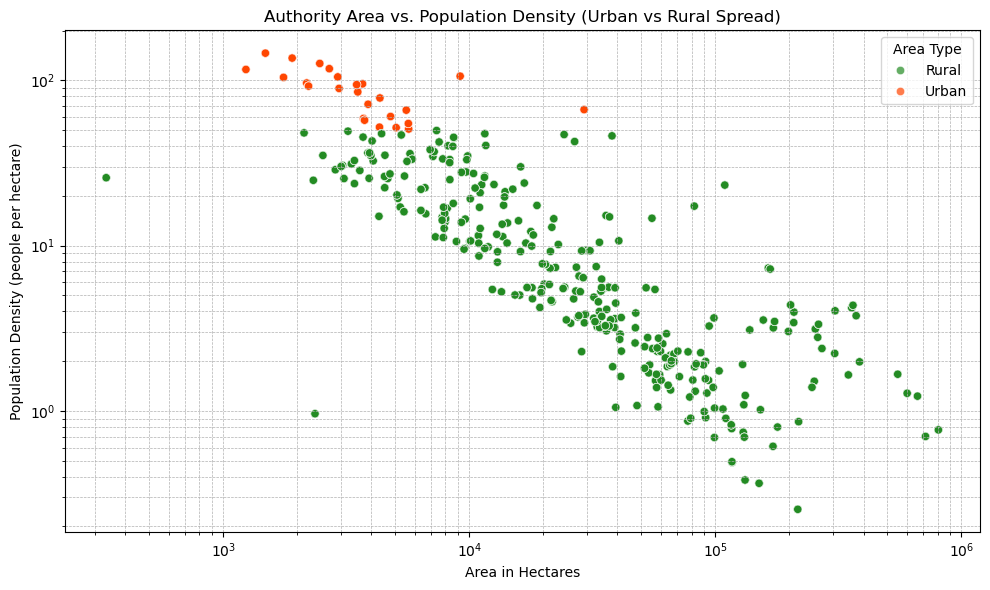

In [20]:
# Create a simplified scatter "geo-style" map based on Area vs Density, color-coded by Urban/Rural
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=metrics_df,
    x="Area in Hectares",
    y="Population Density of Authority",
    hue="Area Type",
    palette={"Urban": "orangered", "Rural": "forestgreen"},
    alpha=0.7
)
plt.title("Authority Area vs. Population Density (Urban vs Rural Spread)")
plt.xlabel("Area in Hectares")
plt.ylabel("Population Density (people per hectare)")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [22]:
# Top 10 urban authorities by population density
top_urban_by_density = metrics_df[metrics_df["Area Type"] == "Urban"]\
    .sort_values(by="Population Density of Authority", ascending=False)\
    .drop_duplicates(subset="Authority")\
    .head(10)[["Authority", "Population Density of Authority", "Population of Authority", "Area in Hectares"]]

top_urban_by_density

RowText,Authority,Population Density of Authority,Population of Authority,Area in Hectares
576,Islington LB,146.087,216767.0,1483.823
468,Hackney LB,136.403,259956.0,1905.795
1164,Tower Hamlets LB,126.544,312273.0,2467.695
600,Lambeth LB,117.675,317498.0,2698.097
903,Royal Borough of Kensington and Chelsea,116.394,143940.0,1236.662
1264,Western Riverside Waste Authority,106.026,973100.0,9177.934
1031,Southwark LB,104.914,306374.0,2920.231
483,Hammersmith and Fulham LB,104.257,183295.0,1758.108
175,Camden LB,96.361,210390.0,2183.360
728,Newham LB,95.237,350626.0,3681.604
